In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl

In [3]:
# read in data
fever_df = pd.read_csv("./Resources/household_transmission_case.csv", index_col=0)
fever_df

,device_id,household_size,total_household_children,total_household_adults,state,profile_id_index,yyyymmdd_index,profile_id_contact,yyyymmdd_contact,serial_interval,age_index,age_contact,secondary_transmission,temperature_c_index
1,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210114,NaN,0,NaN,1.0,NaN,0,37.9
2,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210515,NaN,0,NaN,1.0,NaN,0,38.1
3,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210629,NaN,0,NaN,2.0,NaN,0,39.8
4,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210907,NaN,0,NaN,2.0,NaN,0,38.7
5,00025CC1-48AC-4499-93E4-83BB4749D074,5,2,1,NC,8a3e0dc4-df44-45a9-b6cd-c2b922c235b7,20211015,NaN,0,NaN,7.0,NaN,0,38.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180377,FFFDFDF4-DFB8-4185-8F31-E1A6E1B119BB,5,4,1,CA,a4bd0f29-e7b4-48b0-8424-83379a7a024a,20210524,NaN,0,NaN,1.0,NaN,0,39.2
180378,FFFDFDF4-DFB8-4185-8F31-E1A6E1B119BB,5,4,1,CA,a4bd0f29-e7b4-48b0-8424-83379a7a024a,20210710,NaN,0,NaN,1.0,NaN,0,37.8
180379,FFFEE544-73D6-4E11-B418-CCE420AA585F,4,2,2,SC,171ab6af-bdb0-4186-844f-16466e8b0f9d,20210902,NaN,0,NaN,0.0,NaN,0,38.0
180380,FFFF1B8A-D153-4C9E-8088-D18C5A49423E,2,1,0,NE,0f6246a0-61c2-4bb2-8ec7-a1fdeb8fa7e6,20211215,NaN,0,NaN,6.0,NaN,0,38.0


In [3]:
#check variable datatypes
fever_df.dtypes

device_id                    object
household_size                int64
total_household_children      int64
total_household_adults        int64
state                        object
profile_id_index             object
yyyymmdd_index                int64
profile_id_contact           object
yyyymmdd_contact              int64
serial_interval             float64
age_index                   float64
age_contact                 float64
secondary_transmission        int64
temperature_c_index         float64
dtype: object

In [4]:
# convert "yyyymmdd_index" variable to str for conversion to datetime
fever_df['date_time'] = fever_df['yyyymmdd_index'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [5]:
# create a "week_num" variable from converted "date_time" variable
fever_df["week_num"] = fever_df["date_time"].apply(lambda x: datetime.date(x).isocalendar()[1])
fever_df["week_num"]

1          2
2         19
3         26
4         36
5         41
          ..
180377    21
180378    27
180379    35
180380    50
180381     1
Name: week_num, Length: 180381, dtype: int64

In [6]:
# find number of secondary transmission cases
sum(fever_df["secondary_transmission"] == 1)

20007

In [7]:
#create a dataframe with only index cases that have had a fever
fever_only_df = fever_df[fever_df["temperature_c_index"] >= 38]
fever_only_df

,device_id,household_size,total_household_children,total_household_adults,state,profile_id_index,yyyymmdd_index,profile_id_contact,yyyymmdd_contact,serial_interval,age_index,age_contact,secondary_transmission,temperature_c_index,date_time,week_num
2,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210515,NaN,0,NaN,1.0,NaN,0,38.1,2021-05-15,19
3,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210629,NaN,0,NaN,2.0,NaN,0,39.8,2021-06-29,26
4,000233CC-EDC5-4EFC-A5F8-2A5CE351D067,3,1,2,VA,fb44600f-ac7f-46a7-be65-aebc920d35e9,20210907,NaN,0,NaN,2.0,NaN,0,38.7,2021-09-07,36
5,00025CC1-48AC-4499-93E4-83BB4749D074,5,2,1,NC,8a3e0dc4-df44-45a9-b6cd-c2b922c235b7,20211015,NaN,0,NaN,7.0,NaN,0,38.2,2021-10-15,41
7,0003361B-CB1A-4794-87E9-0615432C687A,3,1,2,NJ,e1ff44fa-b1a6-4160-a0c0-95efd8aa21c8,20210717,NaN,0,NaN,3.0,NaN,0,38.1,2021-07-17,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180375,FFFDFDF4-DFB8-4185-8F31-E1A6E1B119BB,5,4,1,CA,a4bd0f29-e7b4-48b0-8424-83379a7a024a,20210330,NaN,0,NaN,1.0,NaN,0,39.2,2021-03-30,13
180376,FFFDFDF4-DFB8-4185-8F31-E1A6E1B119BB,5,4,1,CA,a4bd0f29-e7b4-48b0-8424-83379a7a024a,20210508,NaN,0,NaN,1.0,NaN,0,38.6,2021-05-08,18
180377,FFFDFDF4-DFB8-4185-8F31-E1A6E1B119BB,5,4,1,CA,a4bd0f29-e7b4-48b0-8424-83379a7a024a,20210524,NaN,0,NaN,1.0,NaN,0,39.2,2021-05-24,21
180379,FFFEE544-73D6-4E11-B418-CCE420AA585F,4,2,2,SC,171ab6af-bdb0-4186-844f-16466e8b0f9d,20210902,NaN,0,NaN,0.0,NaN,0,38.0,2021-09-02,35


In [8]:
# sort the values based on week
fever_only_df = fever_only_df.sort_values('week_num')
fever_only_df

,device_id,household_size,total_household_children,total_household_adults,state,profile_id_index,yyyymmdd_index,profile_id_contact,yyyymmdd_contact,serial_interval,age_index,age_contact,secondary_transmission,temperature_c_index,date_time,week_num
165317,EA964C21-69CB-4DBC-836F-8276332B3156,2,1,1,TX,1b2d4971-0c24-47ee-b266-dac84a6784de,20210109,NaN,0,NaN,1.0,NaN,0,38.1,2021-01-09,1
157340,DFAF4D61-63A6-4CA4-973F-C45AD2386707,3,2,1,TX,2324179c-4eb2-4c78-be58-61a3ff041d02,20210105,NaN,0,NaN,0.0,NaN,0,39.5,2021-01-05,1
70849,65B02CE8-E0ED-442F-8E87-8583C81E3FA0,3,1,2,IL,cc89ca21-1313-4b5b-a997-5cfe73155eef,20210108,NaN,0,NaN,39.0,NaN,0,39.7,2021-01-08,1
40059,39C0FE8B-0FD1-4CDF-84F0-0F3F5059019C,2,1,1,NC,0b205071-0e6e-4415-a12f-55beda21b0b2,20210105,NaN,0,NaN,1.0,NaN,0,38.7,2021-01-05,1
179134,FE471F4A-1E57-4226-B758-0858C46D02E7,2,0,2,CA,287fc124-c13b-40ce-9892-320a6f191645,20210108,NaN,0,NaN,66.0,NaN,0,38.1,2021-01-08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133137,BDD60F9B-B9A2-43A7-9DC1-AC4495966105,4,2,2,AR,bb5b7dd2-9c23-40b3-a17d-f96ed415f64b,20210101,NaN,0,NaN,10.0,NaN,0,38.0,2021-01-01,53
60636,5761C8ED-AD13-4656-A2EC-F1C76207CDD8,4,2,2,OH,1ab35959-c16a-4b8d-a426-60d161f4ef51,20210103,NaN,0,NaN,2.0,NaN,0,38.1,2021-01-03,53
161350,E529591A-EDCE-4C09-9D70-200CF27AD00D,4,2,2,AZ,28564bae-3ecd-4b1d-a95f-74205d8a05c9,20210101,e7f1f1c7-8156-4111-8133-a660e3723bf4,20210102,1.0,9.0,6.0,1,38.0,2021-01-01,53
34299,31796CFD-E3A6-4D8B-BBD9-AC6FD40B3CDB,4,2,2,CA,613b08af-2254-4d2c-acdc-c96bb1cc7ddf,20210101,NaN,0,NaN,29.0,NaN,0,40.3,2021-01-01,53


In [9]:
#see the maximum value for fever
fever_only_df["temperature_c_index"].max()

45.0

In [10]:
# verify only those with fever are included by checking minimum
fever_only_df["temperature_c_index"].min()

38.0

In [11]:
# find number of secondary transmission cases
sum(fever_only_df["secondary_transmission"] == 1)

15655

In [15]:
# group by household
profile_groups_df = fever_only_df.groupby(['profile_id_index', 'date_time'], as_index=False).agg({
    'secondary_transmission': sum,
    'household_size' : 'first',
    'profile_id_index': 'first',
    'week_num': 'first'
})
profile_groups_df

,date_time,secondary_transmission,household_size,profile_id_index,week_num
0,2021-11-19,0,3,0002d79f-2ace-42ef-a2d5-d9a4853665ef,46
1,2021-12-26,0,4,00048cf0-165f-459c-8caa-e76487a763e8,51
2,2021-08-28,0,2,0004d794-d96a-43b5-bccf-c92241af2b1c,34
3,2021-11-17,0,2,0004d794-d96a-43b5-bccf-c92241af2b1c,46
4,2021-11-09,0,3,0004f9b8-f795-4b3f-b132-f87972f254eb,45
...,...,...,...,...,...
130615,2021-11-11,0,4,ffff8c1c-2260-41cf-bcc7-f3f851b730da,45
130616,2021-11-15,0,4,ffff8c1c-2260-41cf-bcc7-f3f851b730da,46
130617,2021-11-17,0,4,ffff8c1c-2260-41cf-bcc7-f3f851b730da,46
130618,2021-12-03,0,4,ffff8c1c-2260-41cf-bcc7-f3f851b730da,48


In [16]:
#group by week then sum by week the household size, secondary transmission cases, and count of profiles that have fever
week_groups_df = profile_groups_df.groupby(['week_num'], as_index=False).agg({
    'secondary_transmission': sum,
    'household_size' : sum,
    'profile_id_index': 'count'
})
week_groups_df

,week_num,secondary_transmission,household_size,profile_id_index
0,1,161,5268,1581
1,2,126,4937,1503
2,3,112,4766,1418
3,4,99,4588,1391
4,5,84,4590,1379
5,6,76,4616,1415
6,7,64,4067,1256
7,8,90,4286,1302
8,9,66,4464,1354
9,10,78,4758,1442


In [34]:
sum(week_groups_df["secondary_transmission"])

15655

In [17]:
profile_groups_df["secondary_transmission"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [18]:
#rename columns
week_renamed_df = week_groups_df.rename(columns={"secondary_transmission": "secondary_case_sum", 
                               "household_size": "household_size_sum", 
                               "profile_id_index": "count_profile_id"})
week_renamed_df

,week_num,secondary_case_sum,household_size_sum,count_profile_id
0,1,161,5268,1581
1,2,126,4937,1503
2,3,112,4766,1418
3,4,99,4588,1391
4,5,84,4590,1379
5,6,76,4616,1415
6,7,64,4067,1256
7,8,90,4286,1302
8,9,66,4464,1354
9,10,78,4758,1442


In [21]:
#calculate secondary attack rate by week
week_renamed_df["secondary_attack_rate_percentage"] = week_renamed_df["secondary_case_sum"]/(week_renamed_df["household_size_sum"]-week_renamed_df["count_profile_id"])*100

In [22]:
# display the dataframe with secondary attack rate percentage
week_renamed_df

,week_num,secondary_case_sum,household_size_sum,count_profile_id,secondary_attack_rate_percentage
0,1,161,5268,1581,4.366694
1,2,126,4937,1503,3.669190
2,3,112,4766,1418,3.345281
3,4,99,4588,1391,3.096653
4,5,84,4590,1379,2.616007
5,6,76,4616,1415,2.374258
6,7,64,4067,1256,2.276770
7,8,90,4286,1302,3.016086
8,9,66,4464,1354,2.122186
9,10,78,4758,1442,2.352232


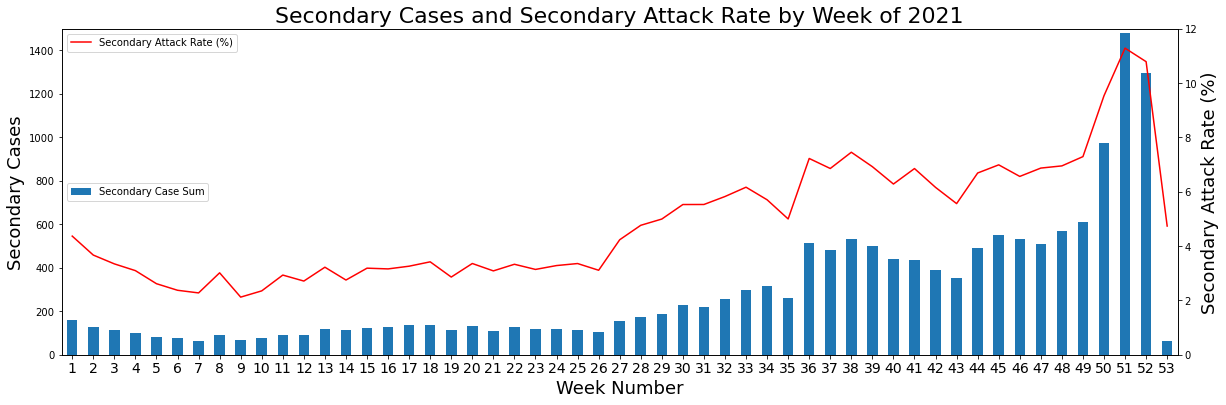

In [30]:
# set the width of the bars
width = .5

#create graphs for plot
ax = week_renamed_df[['secondary_case_sum']].plot(kind='bar', width = width)
ax2 = week_renamed_df['secondary_attack_rate_percentage'].plot(secondary_y=True, color='red')
ax2.set_ylim(0, 12.0)
ax.set_ylim(0, 1500)

ax.set_xlim([-width, len(week_renamed_df['week_num'])-width])
ax.set_xticklabels((week_renamed_df['week_num']), fontsize=14)
ax.set_xlabel("Week Number", fontsize=18)
ax.set_ylabel("Secondary Cases", fontsize=18)
ax2.set_ylabel("Secondary Attack Rate (%)", fontsize=18)
ax.set_title("Secondary Cases and Secondary Attack Rate by Week of 2021", fontsize=22)
ax.legend(["Secondary Case Sum", "Secondary Attack Rate"], loc='center left')
ax2.legend(["Secondary Attack Rate (%)"], loc='best')
ax = plt.gca()

mpl.rcParams['figure.figsize'] = (6,6)

plt.show()

In [133]:
fever_only_df.to_csv('./Resources/fever_only_df.csv', index = False)